# CMSE 201: Quiz 4 (Section 005 - Spring 2024)

## <p style="text-align: right;"> &#9989; Put your name here</p>


The goal of this quiz is to give you the opportunity to test out more of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your more recently acquired programming skills.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This quiz is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the quiz.

**If ChatGPT is used**, _you must cite it_ with the access date and the prompt as described in the course [Generative AI policy](https://msu-cmse-courses.github.io/cmse201-S24-jb/Course_Materials-201/AI_Policy/CMSE201_GenerativeAI_Policy.html). Without appropriate citation, you may **receive partial or no credit.**


There are a total of **40 points** possible on this quiz and each part of the quiz can be done independently. **If you get stuck _move on to another part of the quiz to earn some points there!_**


![Moira](https://media.giphy.com/media/26gs78HRO8sOuhTkQ/giphy.gif)

---
<a id="toc"></a>

## Table of Contents

[Part 0. Academic Integrity Statement](#part_0) (4 point)

[Part 1. Modeling drug metabolism in the body](#part_1)  (12 points)

[Part 2. Solving the drug model](#part_2)  (12 points)

[Part 3. Fitting East Lansing Temporature data](#part_3) (12 points)

In [1]:
points_list = [4, 12, 12, 12]

print(f"The total number of points is : {sum(points_list)}")

The total number of points is : 40


---
<a id="part_0"></a>

# Part 0. Academic integrity statement (4 points)

[Back to Top](#toc)

In the markdown cell below, put your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.


<font size=6 color="#009600">&#9998;</font>   * I, _Joseph Burke_, commit to _ upholding all that is expected of a student of Michigan State University on the grounds of honesty and integrity in the classroom.  I'm greatly excited and thankful for my time at MSU and all the opportunities and clubs I'm exposed to and am apart of, and I hope to stay committed and helpful to those groups as much as possible.  I pledge to stay on top of my work and to source everything I use properly and ethically. I will also advocate for the ethical use of data and the distrubution of clear and honest information, and to educate as many people as I can about the effects of bias in data and algarithms. I will reflect the truth in all of my work and will not spread false information.  I will follow the MSU Policy throughout my entire time here, do and turn in  my own work, and grow from the effort I put into this course.   _*

In [2]:
# run this cell to load the relevant modules for this quiz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

---
<a id="part_1"></a>

# Part 1. Modeling drug metabolism in the body (12 points)

Here, you will write a model to describe how a drug is absorbed, distributed, and cleared from the body (a.k.a, pharmacokinetics, PK, read more [here](https://blog.djnavarro.net/posts/2023-12-19_solving-two-compartment-pk-models/#:~:text=A%20two%20compartment%20pharmacokinetic%20model,-As%20in%20every&text=The%20state%20of%20our%20system,amount%20in%20the%20peripheral%20compartment.)). We will consider your body a three-compartment system consisting of the gut (G), the blood (B), and the tissues (T). Their relations can be described by the following equations:


\begin{align}
\newcommand{\dd}[2]{\dfrac{\mathbf{d}\,#1}{\mathbf{d}\,#2}}
\dd{G}{t} & = - k_{gb} G\\
\dd{B}{t} & = k_{gb} G - (k_{bt}+k_{c}) B + k_{tb} T\\
\dd{T}{t} & = k_{bt} B - k_{tb} T
\end{align}


where the parameters indicate:
- $k_{gb}$ the rate at which the drug is absorbed from the gut into the blood
- $k_{bt}$ the rate at which the drug is absorbed into the tissues from the blood
- $k_c$ the rate at which the drug is cleared from the blood
- $k_{tb}$ the rate at which the drug in the tissue diffuses back to the blood. 

&#9989;&nbsp; **Task:** In the cell below, write a function called `pk` that computes the three derivatives above.

**IMPORTANT:** This function will be used by `solve_ivp`, therefore the inputs should be in a specific order and grouped in a specified way. Check HW, PCA, ICA, or internet for the correct way.

- Make sure the inputs are in the correct order **(2 points)**.
- Make sure you unpack the current state of the system in the correct order **(2 points)**
- Make sure the constants are passed in the correct order **(2 points)**. **NOTE:** Do not hardcode these!!!
- Write the correct equations. Check the sign of every variable **(4 points)**
- Make sure you are returning the derivatives in the correct order **(2 points)**

In [3]:
# Put your code here
def pk(t,y,kgb,kbt,kc,ktb):
    Gi, Bi, Ti = y
    
    dGdt = -kgb * Gi
    dBdt = kgb * Gi - (kbt+kc)*Bi+ktb*Ti
    dTdt = kbt*Bi-ktb*Ti
    
    return [dGdt, dBdt, dTdt]

---
<a id="part_2"></a>

# Part 2: Solving the drug model (12 points)

Now you will find out how the drug consentration in different compartments overtime, given the rate paramters
- $k_{gb} = 0.3$
- $k_{bt} = 0.2$
- $k_{c} = 0.3$
- $k_{tb} = 0.1$

&#9989;&nbsp; **Task:** Complete the code in the cell below to compute the solutions of drug consentration in gut (G), the blood (B), and the tissue (T) using `solve_ivp`. You will need to:

- call `solve_ivp` and give it all the relevant information, including the function `pk` you defined in Part 1, the time information, parameters, and initial conditions that we already defined for you in the cell below. 

- unpack the solution into three variables G, B, T.

- plot the solution (code provided).

If everything goes well, you should get a figure like this

<a href="sol"><img src="https://i.ibb.co/xYYn6RL/pk-sol.png" alt="pk-sol" border="0"></a>


100


Text(0.5, 1.0, 'Body Drug Concentration')

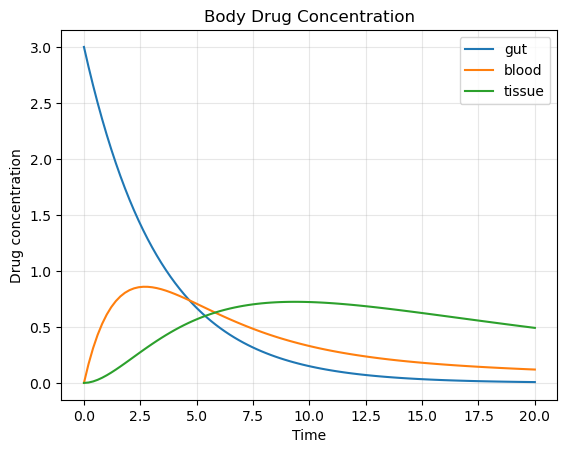

In [4]:

#define derivatives function
def pk(t,y,kgb,kbt,kc,ktb):
    Gi, Bi, Ti = y
    
    dGdt = -kgb * Gi
    dBdt = kgb * Gi - (kbt+kc)*Bi+ktb*Ti
    dTdt = kbt*Bi-ktb*Ti
    
    return [dGdt, dBdt, dTdt]

# define time points
tstart, tend = 0.0, 20.
nsteps = 100
time = np.linspace(tstart, tend, nsteps)

# define constants
k_gb = 0.3 
k_bt = 0.2
k_c = 0.3
k_tb = 0.1

params = (k_gb,k_bt,k_c,k_tb)


# define initial conditions
G0 = 3
B0 = 0
T0 = 0

y0 = (G0, B0, T0)

## PUT YOUR SOLVE_IVP CODE HERE ##
def run_simulation(initial_state, params):
    
    soln = solve_ivp(pk, (tstart, tend), y0, t_eval=time, args= params)
    G, B, T = soln.y  # Extract the solution

    solution = [time, G, B, T]
    
    return solution

time, G, B, T = run_simulation(y0,params)

print(len(G))

##################################

# plot the solution
plt.plot(time,G,label="gut")
plt.plot(time,B,label="blood")
plt.plot(time,T,label="tissue")
plt.grid(alpha = 0.3)
plt.legend()
plt.ylabel("Drug concentration")
plt.xlabel("Time")
plt.title("Body Drug Concentration")


---
<a id="part_3"></a>

# Part 3: Fitting East Lansing Temporature data (12 points):

You want create a mathematical model of the East Lansing's temperature. You have found some data online ([Source](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488?file=32874086)). Run the cell below to load the data from the csv file (should be downloaded from D2L). 


Text(0, 0.5, 'Max Temperature [F]')

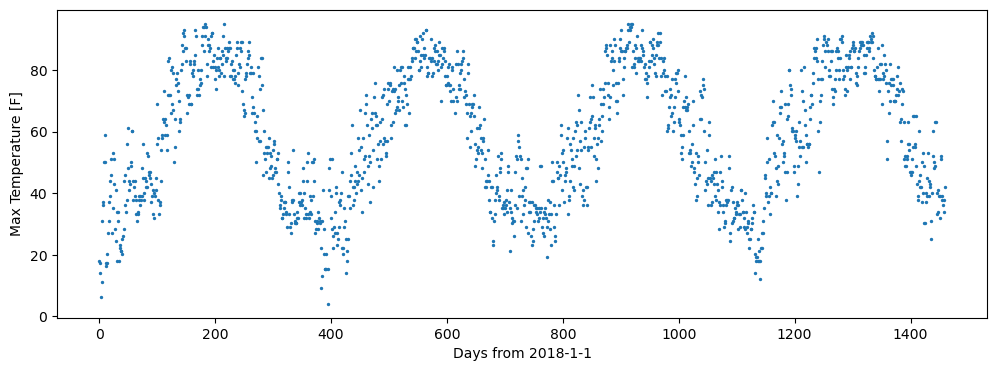

In [5]:
# Run this cell to load and plot the East Lansing temperature data

# load the dataframe
dat = pd.read_csv("EL_temp_f2018.csv")# make sure you have downloaded the csv file from D2L!


# plot the East Lansing maximum temperature from 2018 to 2022. 
plt.figure(figsize=(12,4))
plt.scatter(dat["Days"],dat["tmax"],2)
plt.xlabel("Days from 2018-1-1")
plt.ylabel("Max Temperature [F]")

&#9989;&nbsp; **Task:** Complete the code below: 
- use `curve_fit` to fit the `sin_model` (code given in the cell below) to data loaded above
- then plot the fitted curve with the appropriate legend

**Note**: successful fitting of this model requires a "good enough" initial guess for each of the four parameters of the model. These parameters have been given below as `a0`, `b0`, `c0`, `d0`.

[-2.66818026e+01  1.71460556e-02 -2.38230312e+01  5.86458292e+01]


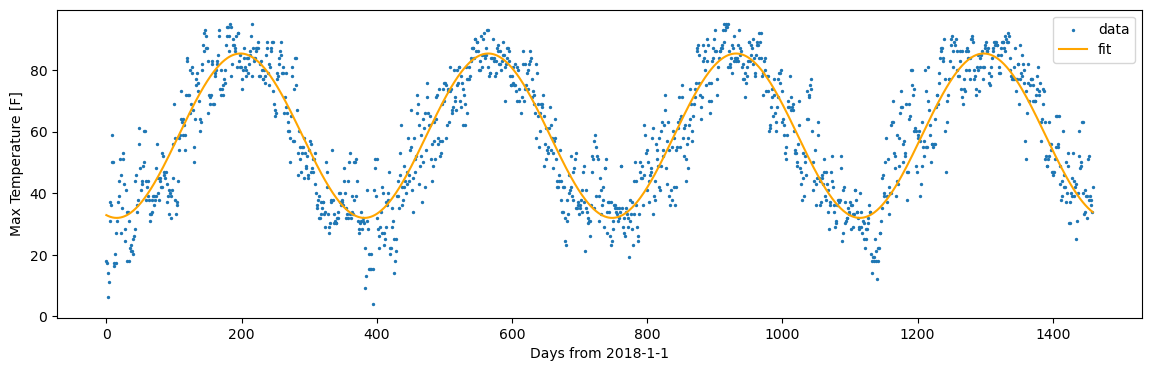

In [6]:
from scipy.optimize import curve_fit


# define the model 
def sin_model(t, a, b, c, d):
    return a * np.sin(b *t + c) + d

# define the initial guess
a0 = 1.0
b0 = (2.0 * np.pi/365.0)
c0 = 0.0
d0 = 50

## ADD THE CODE BELOW TO FIT A CURVE TO TEMPERATURE DATA ##

# Use curve_fit by passing in the function, x data, and y data
best_fit_parameters, just_ignore_this_for_now = curve_fit(sin_model, dat["Days"], dat["tmax"],[a0,b0,c0,d0])
print(best_fit_parameters)

###########################################################

# plot the East Lansing maximum temperature from 2018 to 2022. 
plt.figure(figsize=(14,4))
plt.scatter(dat["Days"],dat["tmax"],2,label="data")

## ADD CODE BELOW TO PLOT THE FITTED CURVE ##
y = sin_model(dat["Days"], best_fit_parameters[0],best_fit_parameters[1],best_fit_parameters[2],best_fit_parameters[3]) 

plt.plot(dat["Days"],y,label="fit", color = 'orange')

#############################################

plt.xlabel("Days from 2018-1-1")
plt.ylabel("Max Temperature [F]")
plt.legend()

---

# Congratulations, you're done!

Submit this quiz by uploading it to the course Desire2Learn web page.  

Go to the **Quizzes** section, find the submission folder link for **Quiz 04**, and upload it there.


![Moira2](https://media.giphy.com/media/d1E2HnwywoTkES08/giphy.gif)